In [2]:
import pandas as pd
from rdkit import Chem
import seaborn as sns
from tqdm import tqdm
import numpy as np

In [3]:
tqdm.pandas()


In [4]:
chembl = pd.read_csv("ChEMBL/ChEMBL_P08684_activities.csv", sep=";")

/var/folders/4h/4_v2nd3n4dn85gnfv734rbbc0000gn/T/ipykernel_8820/51894694.py:1: DtypeWarning: Columns (32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  chembl = pd.read_csv("ChEMBL/ChEMBL_P08684_activities.csv", sep=";")


In [5]:
chembl

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value
0,CHEMBL1405,ESTRONE,4.0,270.37,0.0,3.82,ESTRONE,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CCC2=O,IC50,NaN,...,SINGLE PROTEIN,CHEMBL1909046,15,DrugMatrix,NaN,NaN,CHEMBL3833782,NaN,NaN,NaN
1,CHEMBL404811,DIGITONIN,NaN,1229.32,NaN,NaN,DIGITONIN,C[C@@H]1CC[C@@]2(OC1)O[C@H]1[C@@H](O)[C@H]3[C@...,Ki,NaN,...,SINGLE PROTEIN,CHEMBL1909046,15,DrugMatrix,NaN,NaN,CHEMBL3833782,NaN,NaN,NaN
2,CHEMBL288857,NaN,NaN,474.55,1.0,5.37,18a,CCCCCO/C(O)=C1\C(C)=NC(C)=C(C(=O)OCCOCCC)C1c1c...,Rate of oxidation,'=',...,SINGLE PROTEIN,CHEMBL1123360,1,Scientific Literature,J Med Chem,1986.0,NaN,NaN,NaN,NaN
3,CHEMBL168471,NaN,NaN,372.46,0.0,1.86,8,CC(C)C[C@H](C=O)NC(=O)[C@@H](NS(=O)(=O)c1ccc(F...,IC50,'=',...,SINGLE PROTEIN,CHEMBL1145779,1,Scientific Literature,J Med Chem,2003.0,NaN,NaN,NaN,NaN
4,CHEMBL168471,NaN,NaN,372.46,0.0,1.86,8,CC(C)C[C@H](C=O)NC(=O)[C@@H](NS(=O)(=O)c1ccc(F...,IC50,'=',...,SINGLE PROTEIN,CHEMBL1145779,1,Scientific Literature,J Med Chem,2003.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53854,CHEMBL4847873,NaN,NaN,421.38,0.0,3.70,11mR,CCC[C@H](c1nc2ccc(Br)cc2c(=O)n1CC)N1C[C@@H](C)...,Inhibition,'=',...,SINGLE PROTEIN,CHEMBL4823330,1,Scientific Literature,ACS Med Chem Lett,2021.0,NaN,Dose = 1.0 microM | TIME = 0.5 hr,INHIBITOR,NaN
53855,CHEMBL4868703,NaN,NaN,419.57,0.0,4.00,11r,CCCC(c1nc2cc(-c3ccncc3)ccc2c(=O)n1CC)N1C[C@@H]...,Inhibition,'=',...,SINGLE PROTEIN,CHEMBL4823330,1,Scientific Literature,ACS Med Chem Lett,2021.0,NaN,Dose = 1.0 microM | TIME = 0.5 hr,INHIBITOR,NaN
53856,CHEMBL254316,RALTEGRAVIR,4.0,444.42,0.0,0.91,53,Cc1nnc(C(=O)NC(C)(C)c2nc(C(=O)NCc3ccc(F)cc3)c(...,Activity,'=',...,SINGLE PROTEIN,CHEMBL5244274,1,Scientific Literature,J Med Chem,2021.0,NaN,NaN,ACTIVATOR,NaN
53857,CHEMBL5183579,NaN,NaN,557.65,2.0,5.05,37,N#Cc1ccc(CN2CCC(NC(=O)c3ccc(C(=O)N4CCC(C(F)c5c...,IC50,NaN,...,SINGLE PROTEIN,CHEMBL5108030,1,Scientific Literature,Bioorg Med Chem,2022.0,NaN,NaN,NaN,NaN


In [6]:
chembl.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties',
       'Action Type', 'Standard Text Value'],
 

In [7]:
chembl["Data Validity Comment"].value_counts()

Data Validity Comment
Outside typical range            273
Potential missing data             7
Potential transcription error      5
Name: count, dtype: int64

In [8]:
chembl["Action Type"].value_counts()

Action Type
INHIBITOR        1152
SUBSTRATE         119
ACTIVATOR          73
DEGRADER            9
BINDING AGENT       7
ANTAGONIST          3
Name: count, dtype: int64

In [9]:
chembl["Standard Units"].value_counts()

Standard Units
nM               33691
%                 6351
uM                 720
/min               145
hr                  70
min-1               56
/s                  42
/uM/min             26
degrees C           24
pmol/min            24
mL.min-1.g-1        18
nmol/min            16
min                 15
10^-4/min           13
mM                  13
%/min               12
uL/min              11
nm                   9
L/min/umol           9
uL/min/pmol          8
10'-4/min            6
pmol/hr              4
/min/nM              4
%/min/pmol           4
10'3ml/min           3
ug.mL-1              3
ml/min/mg            3
nmol/min/mg          3
/min/microM          3
ml/min/nmol          3
ug/L                 3
ml/min/uL            2
pmol/mg.min          2
uL/mg/min            2
pmol/min/pmol        2
uL/min.mg            2
/nM.min              2
uL/min/nmol          2
/hr                  1
mol/min              1
ul.min.nmol-1        1
ng/ml                1
pmol.min.mg-1      

In [10]:
chembl["Standard Type"].value_counts()

Standard Type
AC50                          17143
Potency                       13692
IC50                          12205
Inhibition                     4994
Activity                       1704
Ki                             1121
Drug metabolism                 507
INH                             496
TDI                             412
Ratio IC50                      263
FC                              237
Stability                       126
Kinact                          111
Ratio                            97
K                                79
Km                               71
T1/2                             70
Log 1/Km                         58
CL                               54
Compound recovery                54
EC50                             45
Kcat                             44
mechanism based inhibition       34
Ks                               31
Vmax                             28
Rate of oxidation                18
Delta Tm                         16
Kd            

<Axes: xlabel='pChEMBL Value', ylabel='Count'>

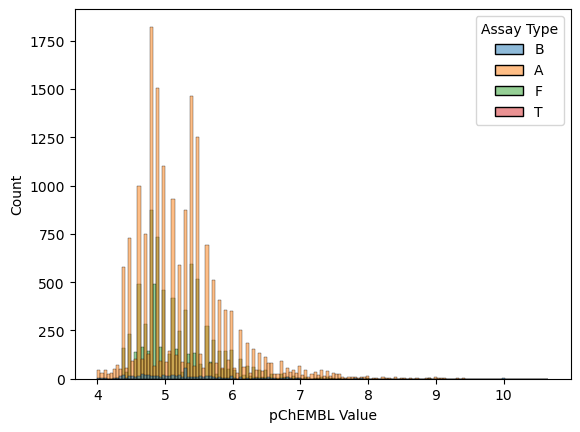

In [11]:
sns.histplot(data=chembl, x="pChEMBL Value", hue="Assay Type")

<Axes: xlabel='Action Type', ylabel='count'>

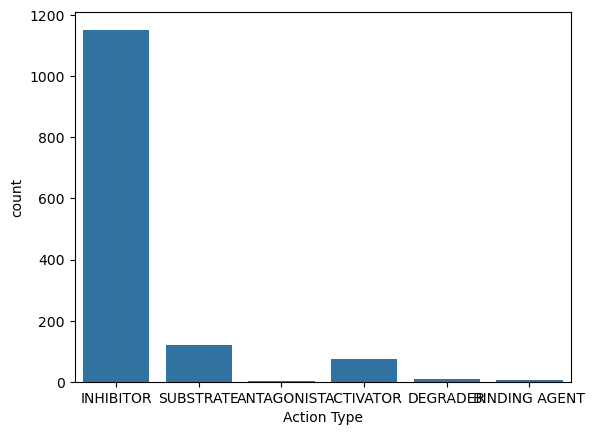

In [12]:
sns.countplot(data=chembl, x="Action Type")

In [13]:
chembl["Molecule ChEMBL ID"].nunique()

33986

In [14]:
chembl["Assay ChEMBL ID"].nunique()

4931

33986 unique molecules
4931 unique assays 


In [15]:

# from Pat Walters method
def standardize_smiles(smiles):
    try:
        # follows the steps in
        # https://github.com/greglandrum/RSC_OpenScience_Standardization_202104/blob/main/MolStandardize%20pieces.ipynb
        # as described **excellently** (by Greg) in
        # https://www.youtube.com/watch?v=eWTApNX8dJQ
        mol = Chem.MolFromSmiles(smiles)
    
        # removeHs, disconnect metal atoms, normalize the molecule, reionize the molecule
        clean_mol = rdMolStandardize.Cleanup(mol)
    
        # if many fragments, get the "parent" (the actual mol we are interested in) 
        parent_clean_mol = rdMolStandardize.FragmentParent(clean_mol)
    
        # try to neutralize molecule
        uncharger = rdMolStandardize.Uncharger()  # annoying, but necessary as no convenience method exists
        uncharged_parent_clean_mol = uncharger.uncharge(parent_clean_mol)
    
        # note that no attempt is made at reionization at this step
        # nor at ionization at some pH (rdkit has no pKa caculator)
        # the main aim to represent all molecules from different sources
        # in a (single) standard way, for use in ML, catalogue, etc.
    
        te = rdMolStandardize.TautomerEnumerator()  # idem
        taut_uncharged_parent_clean_mol = te.Canonicalize(uncharged_parent_clean_mol)
    
        return Chem.MolToSmiles(taut_uncharged_parent_clean_mol)
    except:
        return pd.NA

In [18]:
# standardisation of SMILES
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.rdBase import BlockLogs
import mols2grid

In [19]:

with BlockLogs():
    chembl["CANONICAL_SMILES"] = chembl["Smiles"].progress_apply(lambda x: standardize_smiles(x))

100%|██████████| 53859/53859 [08:03<00:00, 111.31it/s]


In [20]:
def smi_to_inchikey(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        return Chem.MolToInchiKey(mol)
    except:
        return pd.NA

In [21]:
# compute inchikeys
with BlockLogs():
    chembl["INCHIKEY"] = chembl["CANONICAL_SMILES"].progress_apply(lambda x: smi_to_inchikey(x))

100%|██████████| 53859/53859 [00:12<00:00, 4393.22it/s]


In [22]:
chembl.INCHIKEY.nunique()

33406

In [23]:
chembl.dropna(subset="INCHIKEY", inplace=True)

# select higher quality data

See here for more detail 

https://greglandrum.github.io/rdkit-blog/posts/2023-06-12-overlapping-ic50-assays1.html


## What we will do 

* Select assays with IC50, AC50, pIC50, XC50, EC50, Ki or potency endpoints
* Select assays in nM
* Select assays with more then N molecules (20, 10?)
* Select compounds that appear in more than L of these assays (2, 3 , 5)?

In [24]:
better_assay = chembl[
    (chembl['Standard Type'] == 'IC50') |
    (chembl['Standard Type'] == 'AC50') |
    (chembl['Standard Type'] == 'pIC50') |
    (chembl['Standard Type'] == 'XC50') |
    (chembl['Standard Type'] == 'EC50') | 
    (chembl['Standard Type'] == 'Ki') |
    (chembl['Standard Type'] == 'Potency')
]

In [25]:
better_assay

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,CANONICAL_SMILES,INCHIKEY
0,CHEMBL1405,ESTRONE,4.0,270.37,0.0,3.82,ESTRONE,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CCC2=O,IC50,NaN,...,15,DrugMatrix,NaN,NaN,CHEMBL3833782,NaN,NaN,NaN,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CCC2=O,DNXHEGUUPJUMQT-CBZIJGRNSA-N
1,CHEMBL404811,DIGITONIN,NaN,1229.32,NaN,NaN,DIGITONIN,C[C@@H]1CC[C@@]2(OC1)O[C@H]1[C@@H](O)[C@H]3[C@...,Ki,NaN,...,15,DrugMatrix,NaN,NaN,CHEMBL3833782,NaN,NaN,NaN,C[C@@H]1CC[C@@]2(OC1)O[C@H]1[C@@H](O)[C@H]3[C@...,UVYVLBIGDKGWPX-YCCXZQINSA-N
3,CHEMBL168471,NaN,NaN,372.46,0.0,1.86,8,CC(C)C[C@H](C=O)NC(=O)[C@@H](NS(=O)(=O)c1ccc(F...,IC50,'=',...,1,Scientific Literature,J Med Chem,2003.0,NaN,NaN,NaN,NaN,CC(C)CC(C=O)NC(=O)C(NS(=O)(=O)c1ccc(F)cc1)C(C)C,WSJWUIDLGZAXID-UHFFFAOYSA-N
4,CHEMBL168471,NaN,NaN,372.46,0.0,1.86,8,CC(C)C[C@H](C=O)NC(=O)[C@@H](NS(=O)(=O)c1ccc(F...,IC50,'=',...,1,Scientific Literature,J Med Chem,2003.0,NaN,NaN,NaN,NaN,CC(C)CC(C=O)NC(=O)C(NS(=O)(=O)c1ccc(F)cc1)C(C)C,WSJWUIDLGZAXID-UHFFFAOYSA-N
5,CHEMBL1109,SULFAPHENAZOLE,4.0,314.37,0.0,2.26,SID26747662,Nc1ccc(S(=O)(=O)Nc2ccnn2-c2ccccc2)cc1,Potency,'=',...,7,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,Nc1ccc(S(=O)(=O)Nc2ccnn2-c2ccccc2)cc1,QWCJHSGMANYXCW-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53851,CHEMBL5175220,NaN,NaN,573.75,2.0,5.40,26,CC(=O)N1CCc2c(nc(C)n2[C@@H]2C[C@H]3CC[C@@H](C2...,IC50,'>',...,1,Scientific Literature,J Med Chem,2022.0,NaN,NaN,NaN,NaN,CC(=O)N1CCc2c(nc(C)n2[C@@H]2C[C@H]3CC[C@@H](C2...,CHNHYOHQPDHUOP-QYOOZWMWSA-N
53852,CHEMBL5267910,NaN,NaN,483.59,0.0,4.56,42,O=C(Nc1ccc(-c2ccc(F)cn2)cc1)c1cc2sc(NCCN3CCOCC...,IC50,'=',...,1,Scientific Literature,Bioorg Med Chem,2020.0,NaN,NaN,INHIBITOR,NaN,O=C(Nc1ccc(-c2ccc(F)cn2)cc1)c1cc2sc(NCCN3CCOCC...,RKMXNTQXGVOORY-UHFFFAOYSA-N
53853,CHEMBL4846941,NaN,NaN,570.47,2.0,8.05,8,O=C(O)c1cc(F)c2nc(N3CCC4(C=C(c5c(-c6c(Cl)cccc6...,IC50,'=',...,1,Scientific Literature,ACS Med Chem Lett,2021.0,NaN,TIME = 0.25 hr,INHIBITOR,NaN,O=C(O)c1cc(F)c2nc(N3CCC4(C=C(c5c(-c6c(Cl)cccc6...,HSWCABTYQVCNCT-UHFFFAOYSA-N
53857,CHEMBL5183579,NaN,NaN,557.65,2.0,5.05,37,N#Cc1ccc(CN2CCC(NC(=O)c3ccc(C(=O)N4CCC(C(F)c5c...,IC50,NaN,...,1,Scientific Literature,Bioorg Med Chem,2022.0,NaN,NaN,NaN,NaN,N#Cc1ccc(CN2CCC(NC(=O)c3ccc(C(=O)N4CCC(C(F)c5c...,FJNHSBVZTQFKEF-UHFFFAOYSA-N


In [26]:
better_units = better_assay[better_assay['Standard Units'] == "nM"]
better_units

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,CANONICAL_SMILES,INCHIKEY
3,CHEMBL168471,NaN,NaN,372.46,0.0,1.86,8,CC(C)C[C@H](C=O)NC(=O)[C@@H](NS(=O)(=O)c1ccc(F...,IC50,'=',...,1,Scientific Literature,J Med Chem,2003.0,NaN,NaN,NaN,NaN,CC(C)CC(C=O)NC(=O)C(NS(=O)(=O)c1ccc(F)cc1)C(C)C,WSJWUIDLGZAXID-UHFFFAOYSA-N
4,CHEMBL168471,NaN,NaN,372.46,0.0,1.86,8,CC(C)C[C@H](C=O)NC(=O)[C@@H](NS(=O)(=O)c1ccc(F...,IC50,'=',...,1,Scientific Literature,J Med Chem,2003.0,NaN,NaN,NaN,NaN,CC(C)CC(C=O)NC(=O)C(NS(=O)(=O)c1ccc(F)cc1)C(C)C,WSJWUIDLGZAXID-UHFFFAOYSA-N
5,CHEMBL1109,SULFAPHENAZOLE,4.0,314.37,0.0,2.26,SID26747662,Nc1ccc(S(=O)(=O)Nc2ccnn2-c2ccccc2)cc1,Potency,'=',...,7,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,Nc1ccc(S(=O)(=O)Nc2ccnn2-c2ccccc2)cc1,QWCJHSGMANYXCW-UHFFFAOYSA-N
6,CHEMBL8706,CLORGILINE,2.0,272.18,0.0,3.33,SID11111452,C#CCN(C)CCCOc1ccc(Cl)cc1Cl,Potency,'=',...,7,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,C#CCN(C)CCCOc1ccc(Cl)cc1Cl,BTFHLQRNAMSNLC-UHFFFAOYSA-N
7,CHEMBL1600586,NaN,NaN,417.46,0.0,0.36,SID26751076,COC(=O)C/C=C\[C@@H](C)[C@@H](/C=N\OC[C@@H](O)[...,Potency,'=',...,7,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,COC(=O)C/C=C\[C@@H](C)[C@@H](/C=N\OC[C@@H](O)[...,JOOFLNOPMODRHL-PCZNLFPRSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53850,CHEMBL5287462,NaN,NaN,458.62,0.0,4.62,12d,CN1CCC[C@H](N(c2cc(C#CC(C)(C)C)sc2C(=O)O)C(=O)...,IC50,'>',...,1,Scientific Literature,ACS Med Chem Lett,2017.0,NaN,TIME = 0.1667 hr,NaN,NaN,CC1CCC(C(=O)N(c2cc(C#CC(C)(C)C)sc2C(=O)O)C2CCC...,MGEVBIDQMYTWFL-UHFFFAOYSA-N
53851,CHEMBL5175220,NaN,NaN,573.75,2.0,5.40,26,CC(=O)N1CCc2c(nc(C)n2[C@@H]2C[C@H]3CC[C@@H](C2...,IC50,'>',...,1,Scientific Literature,J Med Chem,2022.0,NaN,NaN,NaN,NaN,CC(=O)N1CCc2c(nc(C)n2[C@@H]2C[C@H]3CC[C@@H](C2...,CHNHYOHQPDHUOP-QYOOZWMWSA-N
53852,CHEMBL5267910,NaN,NaN,483.59,0.0,4.56,42,O=C(Nc1ccc(-c2ccc(F)cn2)cc1)c1cc2sc(NCCN3CCOCC...,IC50,'=',...,1,Scientific Literature,Bioorg Med Chem,2020.0,NaN,NaN,INHIBITOR,NaN,O=C(Nc1ccc(-c2ccc(F)cn2)cc1)c1cc2sc(NCCN3CCOCC...,RKMXNTQXGVOORY-UHFFFAOYSA-N
53853,CHEMBL4846941,NaN,NaN,570.47,2.0,8.05,8,O=C(O)c1cc(F)c2nc(N3CCC4(C=C(c5c(-c6c(Cl)cccc6...,IC50,'=',...,1,Scientific Literature,ACS Med Chem Lett,2021.0,NaN,TIME = 0.25 hr,INHIBITOR,NaN,O=C(O)c1cc(F)c2nc(N3CCC4(C=C(c5c(-c6c(Cl)cccc6...,HSWCABTYQVCNCT-UHFFFAOYSA-N


In [27]:
num_compounds_per_assay = better_units.groupby("Assay ChEMBL ID")["Molecule ChEMBL ID"].nunique()

In [28]:
num_compounds_per_assay

Assay ChEMBL ID
CHEMBL1000505     4
CHEMBL1000506     4
CHEMBL1000805    19
CHEMBL1001513    20
CHEMBL1002238     5
                 ..
CHEMBL996822      6
CHEMBL997024      1
CHEMBL998722      1
CHEMBL999263      3
CHEMBL999389      8
Name: Molecule ChEMBL ID, Length: 2500, dtype: int64

In [29]:
num_compounds_per_assay_df = pd.DataFrame(num_compounds_per_assay)
num_compounds_per_assay_df.rename(columns={"Molecule ChEMBL ID": "molecule_count"}, inplace=True)
num_compounds_per_assay_df

,molecule_count
Assay ChEMBL ID,
CHEMBL1000505,4
CHEMBL1000506,4
CHEMBL1000805,19
CHEMBL1001513,20
CHEMBL1002238,5
...,...
CHEMBL996822,6
CHEMBL997024,1
CHEMBL998722,1


In [30]:
combined = better_units.join(num_compounds_per_assay_df, on="Assay ChEMBL ID")
combined["molecule_count"].unique()

array([   1, 6472,   15,    2,   16,   19,   17,    6,   12,    3,   14,
          7,   25,   42,    8,   28,   22,    4,  187,   18,    5,   10,
         29,   21,   32,   46,   20,   13,   51,   30,   33,   11,   24,
         38,   26,   35,    9,   43,   85, 8633,   34,   39,   23,   27,
         48,   64,  165,   47,   37,   65])

In [31]:
N = 10 # assays must have more than N compounds in them 

In [32]:
more_than_N_compounds = combined[combined["molecule_count"] > N]  

In [33]:
more_than_N_compounds

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,CANONICAL_SMILES,INCHIKEY,molecule_count
5,CHEMBL1109,SULFAPHENAZOLE,4.0,314.37,0.0,2.26,SID26747662,Nc1ccc(S(=O)(=O)Nc2ccnn2-c2ccccc2)cc1,Potency,'=',...,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,Nc1ccc(S(=O)(=O)Nc2ccnn2-c2ccccc2)cc1,QWCJHSGMANYXCW-UHFFFAOYSA-N,6472
6,CHEMBL8706,CLORGILINE,2.0,272.18,0.0,3.33,SID11111452,C#CCN(C)CCCOc1ccc(Cl)cc1Cl,Potency,'=',...,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,C#CCN(C)CCCOc1ccc(Cl)cc1Cl,BTFHLQRNAMSNLC-UHFFFAOYSA-N,6472
7,CHEMBL1600586,NaN,NaN,417.46,0.0,0.36,SID26751076,COC(=O)C/C=C\[C@@H](C)[C@@H](/C=N\OC[C@@H](O)[...,Potency,'=',...,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,COC(=O)C/C=C\[C@@H](C)[C@@H](/C=N\OC[C@@H](O)[...,JOOFLNOPMODRHL-PCZNLFPRSA-N,6472
8,CHEMBL1417358,NaN,NaN,486.57,0.0,4.19,SID17385348,COC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H]1C[C@@H]1[C@...,Potency,'=',...,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,COC(=O)C(Cc1ccccc1)NC(=O)C1C[C@@H]1[C@H](NC(=O...,OABRKEQNGZWBBC-LKIFIEJRSA-N,6472
9,CHEMBL1357941,NaN,NaN,522.56,2.0,5.16,SID11114057,CCOC(=O)C1=C(C)NC(c2ccccc2)=C(C(=O)OCc2ccc([N+...,Potency,'=',...,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,CCOC(=O)C1=C(C)N=C(c2ccccc2)C(C(=O)OCc2ccc([N+...,LRTNJIWAQJAWGO-HSLSYKTRSA-N,6472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53821,CHEMBL4594441,IFIDANCITINIB,2.0,395.39,0.0,4.16,33,COc1cc(Nc2ncc(C)c(Nc3ccc4oc(=O)[nH]c4c3)n2)cc(...,IC50,'>',...,Scientific Literature,ACS Med Chem Lett,2022.0,NaN,NaN,NaN,NaN,COc1cc(Nc2ncc(C)c(Nc3ccc4oc(=O)[nH]c4c3)n2)cc(...,OYFMQDVLFYKOPZ-UHFFFAOYSA-N,11
53834,CHEMBL5092411,NaN,NaN,527.00,2.0,7.45,25,CC1(n2cnc3cnc4cc(F)c(-c5ccc(Oc6ncccn6)cc5Cl)cc...,IC50,'<',...,Scientific Literature,J Med Chem,2022.0,NaN,NaN,INHIBITOR,NaN,CC1(n2cnc3cnc4cc(F)c(-c5ccc(Oc6ncccn6)cc5Cl)cc...,PWQUPCKLWZWJNL-UHFFFAOYSA-N,13
53835,CHEMBL5074449,NaN,NaN,510.82,1.0,4.65,64i,C[C@@]1(c2cc(NC(=O)c3ncc(OC(F)F)cc3Cl)ccc2F)CO...,IC50,'=',...,Scientific Literature,J Med Chem,2021.0,NaN,TIME = 0.1667 hr,INHIBITOR,NaN,C[C@@]1(c2cc(NC(=O)c3ncc(OC(F)F)cc3Cl)ccc2F)CO...,WAZXJCCRJQZNHV-RBUKOAKNSA-N,12
53844,CHEMBL5080846,NaN,NaN,582.73,2.0,6.08,17,C#CCCCCCCCCCCCCCCOCCCOP(=O)(O)CO[C@H](C)Cn1cnc...,IC50,'>',...,Scientific Literature,J Med Chem,2021.0,NaN,TIME = 0.5 hr,NaN,NaN,C#CCCCCCCCCCCCCCCOCCCOP(=O)(O)CO[C@H](C)Cn1cnc...,CRUTYLIWSTWAIE-RUZDIDTESA-N,16


In [34]:
more_than_N_compounds.INCHIKEY = more_than_N_compounds.INCHIKEY.astype(str)

/var/folders/4h/4_v2nd3n4dn85gnfv734rbbc0000gn/T/ipykernel_8820/3449044069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  more_than_N_compounds.INCHIKEY = more_than_N_compounds.INCHIKEY.astype(str)


<Axes: xlabel='pChEMBL Value', ylabel='Count'>

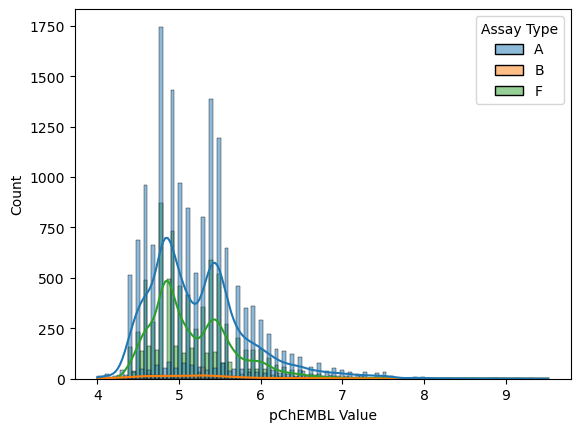

In [35]:
sns.histplot(data=more_than_N_compounds, x="pChEMBL Value", hue="Assay Type", kde=True)

<Axes: xlabel='Molecular Weight', ylabel='Count'>

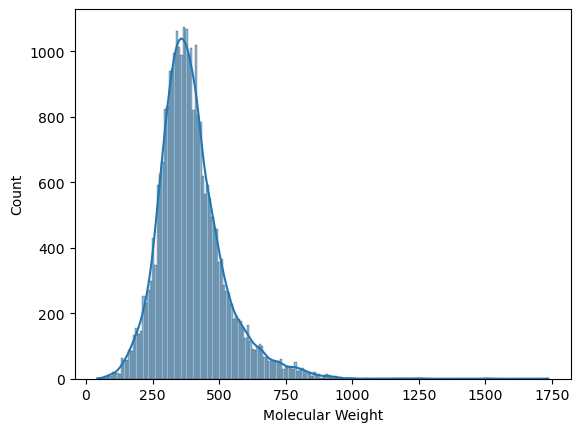

In [36]:
sns.histplot(data=more_than_N_compounds, x="Molecular Weight",  kde=True)

In [37]:
assays = more_than_N_compounds["Assay ChEMBL ID"].nunique()

In [38]:
assays

264

In [39]:
more_than_N_compounds["Molecule ChEMBL ID"].nunique()

15789

In [40]:
num_assays_per_compound_df = more_than_N_compounds.groupby(["INCHIKEY"])["Assay ChEMBL ID"].size().reset_index(name="assay_count")
num_assays_per_compound_df = num_assays_per_compound_df.set_index("INCHIKEY")
num_assays_per_compound_df

,assay_count
INCHIKEY,
AAALVYBICLMAMA-UHFFFAOYSA-N,2
AAASNKNLMQBKFV-UHFFFAOYSA-N,2
AABYLPRACHMDSN-BIWBPYCESA-N,3
AABYLPRACHMDSN-REETXPBOSA-N,3
AACPHNFEDMXRPQ-UHFFFAOYSA-N,2
...,...
ZZVXVMRMJNDKKA-UHFFFAOYSA-N,1
ZZWKZQDOSJAGGF-WLNFFEQUSA-N,2
ZZXHZVKGUYRZKM-UHFFFAOYSA-N,1


<Axes: xlabel='assay_count', ylabel='count'>

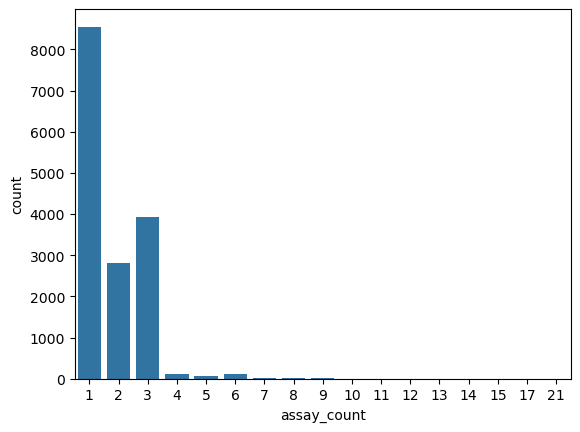

In [41]:
sns.countplot(data=num_assays_per_compound_df, x="assay_count")

In [42]:
combined_2 = more_than_N_compounds.join(num_assays_per_compound_df, on="INCHIKEY")


In [43]:
combined_2.sort_values("assay_count", ascending=False, inplace=True)
combined_2["assay_count"] = combined_2["assay_count"].astype(int)

# Aggregate activity

In [44]:
compound_grouped_mean = combined_2.groupby("INCHIKEY")["pChEMBL Value"].mean()
compound_grouped_mean.reset_index()

,INCHIKEY,pChEMBL Value
0,AAALVYBICLMAMA-UHFFFAOYSA-N,5.80
1,AAASNKNLMQBKFV-UHFFFAOYSA-N,5.60
2,AABYLPRACHMDSN-BIWBPYCESA-N,5.60
3,AABYLPRACHMDSN-REETXPBOSA-N,5.60
4,AACPHNFEDMXRPQ-UHFFFAOYSA-N,NaN
...,...,...
15658,ZZVXVMRMJNDKKA-UHFFFAOYSA-N,6.45
15659,ZZWKZQDOSJAGGF-WLNFFEQUSA-N,5.40
15660,ZZXHZVKGUYRZKM-UHFFFAOYSA-N,4.95
15661,ZZYHXFCSTOMZNZ-UHFFFAOYSA-N,5.82


<Axes: xlabel='pChEMBL mean', ylabel='Count'>

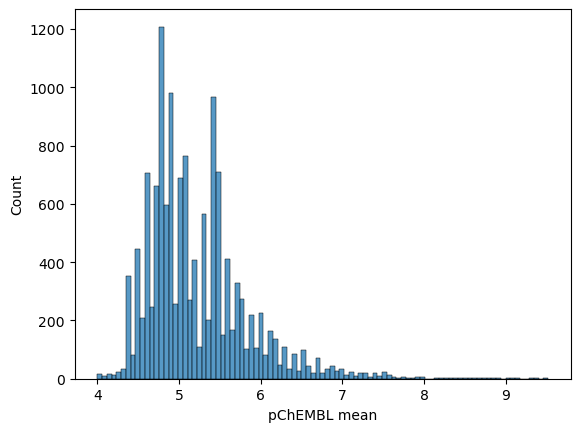

In [45]:
sns.histplot(data=compound_grouped_mean.reset_index(name="pChEMBL mean"),x="pChEMBL mean")

In [46]:
# join 
cgm = compound_grouped_mean.reset_index(name="pChEMBL mean")
cgm = cgm.set_index("INCHIKEY")
combined_3 = combined_2.join(cgm, on="INCHIKEY")


In [47]:
compound_grouped_std = combined_2.groupby("INCHIKEY")["pChEMBL Value"].std()
compound_grouped_std.reset_index()

,INCHIKEY,pChEMBL Value
0,AAALVYBICLMAMA-UHFFFAOYSA-N,0.0
1,AAASNKNLMQBKFV-UHFFFAOYSA-N,0.0
2,AABYLPRACHMDSN-BIWBPYCESA-N,0.0
3,AABYLPRACHMDSN-REETXPBOSA-N,0.0
4,AACPHNFEDMXRPQ-UHFFFAOYSA-N,NaN
...,...,...
15658,ZZVXVMRMJNDKKA-UHFFFAOYSA-N,NaN
15659,ZZWKZQDOSJAGGF-WLNFFEQUSA-N,0.0
15660,ZZXHZVKGUYRZKM-UHFFFAOYSA-N,NaN
15661,ZZYHXFCSTOMZNZ-UHFFFAOYSA-N,NaN


<Axes: xlabel='pChEMBL stdev', ylabel='Count'>

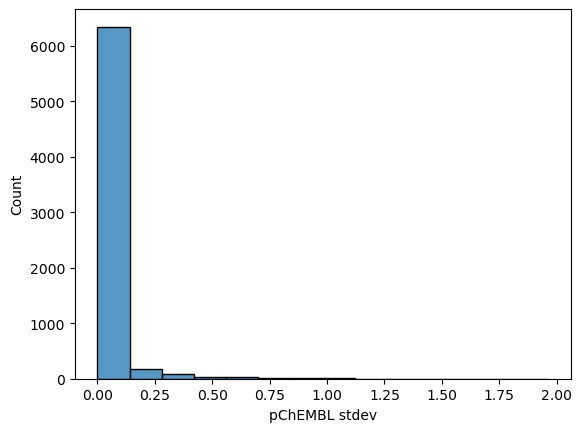

In [48]:
sns.histplot(data=compound_grouped_std.reset_index(name="pChEMBL stdev"),x="pChEMBL stdev")

In [49]:
cgstd = compound_grouped_std.reset_index(name="pChEMBL std")
cgstd = cgstd.set_index("INCHIKEY")
combined_4 =  combined_3.join(cgstd, on="INCHIKEY")

In [50]:
combined_4

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,CANONICAL_SMILES,INCHIKEY,molecule_count,assay_count,pChEMBL mean,pChEMBL std
51260,CHEMBL157101,KETOCONAZOLE,4.0,531.44,1.0,4.21,Ketoconazole,CC(=O)N1CCN(c2ccc(OCC3COC(Cn4ccnc4)(c4ccc(Cl)c...,IC50,'=',...,NaN,NaN,NaN,NaN,CC(=O)N1CCN(c2ccc(OCC3COC(Cn4ccnc4)(c4ccc(Cl)c...,XMAYWYJOQHXEEK-UHFFFAOYSA-N,11,21,7.0135,0.618796
1465,CHEMBL157101,KETOCONAZOLE,4.0,531.44,1.0,4.21,ketoconazole,CC(=O)N1CCN(c2ccc(OCC3COC(Cn4ccnc4)(c4ccc(Cl)c...,IC50,'=',...,NaN,NaN,NaN,NaN,CC(=O)N1CCN(c2ccc(OCC3COC(Cn4ccnc4)(c4ccc(Cl)c...,XMAYWYJOQHXEEK-UHFFFAOYSA-N,28,21,7.0135,0.618796
46633,CHEMBL157101,KETOCONAZOLE,4.0,531.44,1.0,4.21,SID11113916,CC(=O)N1CCN(c2ccc(OCC3COC(Cn4ccnc4)(c4ccc(Cl)c...,Potency,'=',...,NaN,NaN,NaN,NaN,CC(=O)N1CCN(c2ccc(OCC3COC(Cn4ccnc4)(c4ccc(Cl)c...,XMAYWYJOQHXEEK-UHFFFAOYSA-N,6472,21,7.0135,0.618796
654,CHEMBL157101,KETOCONAZOLE,4.0,531.44,1.0,4.21,ketoconazole,CC(=O)N1CCN(c2ccc(OCC3COC(Cn4ccnc4)(c4ccc(Cl)c...,IC50,'=',...,NaN,NaN,NaN,NaN,CC(=O)N1CCN(c2ccc(OCC3COC(Cn4ccnc4)(c4ccc(Cl)c...,XMAYWYJOQHXEEK-UHFFFAOYSA-N,19,21,7.0135,0.618796
48054,CHEMBL157101,KETOCONAZOLE,4.0,531.44,1.0,4.21,BDBM151585,CC(=O)N1CCN(c2ccc(OCC3COC(Cn4ccnc4)(c4ccc(Cl)c...,IC50,'=',...,NaN,NaN,NaN,NaN,CC(=O)N1CCN(c2ccc(OCC3COC(Cn4ccnc4)(c4ccc(Cl)c...,XMAYWYJOQHXEEK-UHFFFAOYSA-N,64,21,7.0135,0.618796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32628,CHEMBL4229127,NaN,NaN,575.50,2.0,6.73,18,COc1cc2ccc(Br)cc2cc1[C@@H](c1cccnc1OC)[C@@](O)...,IC50,'=',...,NaN,NaN,NaN,NaN,COc1cc2ccc(Br)cc2cc1[C@@H](c1cccnc1OC)[C@@](O)...,NEXHJZYPAYGJGS-GRKNLSHJSA-N,15,1,5.1100,NaN
32629,CHEMBL4228130,NaN,NaN,605.53,2.0,6.74,22,COc1cc2ccc(Br)cc2cc1[C@@H](c1ccnc(OC)c1OC)[C@@...,IC50,'>',...,NaN,NaN,NaN,NaN,COc1cc2ccc(Br)cc2cc1[C@@H](c1ccnc(OC)c1OC)[C@@...,LIRVKLMWXXDOTA-AKGWNBJDSA-N,15,1,NaN,NaN
32631,CHEMBL4227540,NaN,NaN,508.59,2.0,6.58,42,COc1cc2ccc(C#N)cc2cc1[C@@H](c1cccc(F)c1)[C@@](...,IC50,'>',...,NaN,NaN,NaN,NaN,COc1cc2ccc(C#N)cc2cc1[C@@H](c1cccc(F)c1)[C@@](...,DZNOWMUCVQNUML-ROJLCIKYSA-N,15,1,NaN,NaN
32632,CHEMBL4228918,NaN,NaN,508.62,2.0,5.73,56,COc1cc2ccc(C#N)cc2cc1[C@@H](c1cccc(C)c1)[C@@](...,IC50,'>',...,NaN,NaN,NaN,NaN,COc1cc2ccc(C#N)cc2cc1[C@@H](c1cccc(C)c1)[C@@](...,XBKFAMWQQPQNSA-XLJNKUFUSA-N,15,1,NaN,NaN


# Calibration of thresholds for activity and stdev?

## variablitiy

We could subselect for inter-assay variability, but we should probably do a more in depth study into this. 

We would need to select ASSAYs that are outliers and drop them rather than dropping compounds most likely. 

Lets leave it for now. 

## activity

Lets take compounds with pChEMBL >= 5.0 (XC50 = 10 um)


In [51]:
pchembl_thresh = 5.0 
active = combined_4[combined_4["pChEMBL mean"] >= pchembl_thresh]

In [52]:
# now clean up 
keep_cols = ["CANONICAL_SMILES", "INCHIKEY", "pChEMBL mean", "pChEMBL std", "Molecule Name", "assay_count", "Action Type"]

In [53]:
clean_active = active[keep_cols]
clean_active.rename(columns={"assay_count":"appears_in_N_ChEMBL_assays", "Molecule Name": "common_name", "Action Type": "action_type"}, inplace=True)
clean_active_sorted = clean_active.sort_values("common_name", ascending=False) # keep the ones with names if possible
clean_deduped = clean_active_sorted.drop_duplicates(subset="INCHIKEY", keep="first")
clean_deduped = clean_deduped.sort_values("appears_in_N_ChEMBL_assays", ascending=False)


/var/folders/4h/4_v2nd3n4dn85gnfv734rbbc0000gn/T/ipykernel_8820/2360465372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_active.rename(columns={"assay_count":"appears_in_N_ChEMBL_assays", "Molecule Name": "common_name", "Action Type": "action_type"}, inplace=True)


In [54]:
clean_active.head()

,CANONICAL_SMILES,INCHIKEY,pChEMBL mean,pChEMBL std,common_name,appears_in_N_ChEMBL_assays,action_type
51260,CC(=O)N1CCN(c2ccc(OCC3COC(Cn4ccnc4)(c4ccc(Cl)c...,XMAYWYJOQHXEEK-UHFFFAOYSA-N,7.0135,0.618796,KETOCONAZOLE,21,NaN
1465,CC(=O)N1CCN(c2ccc(OCC3COC(Cn4ccnc4)(c4ccc(Cl)c...,XMAYWYJOQHXEEK-UHFFFAOYSA-N,7.0135,0.618796,KETOCONAZOLE,21,NaN
46633,CC(=O)N1CCN(c2ccc(OCC3COC(Cn4ccnc4)(c4ccc(Cl)c...,XMAYWYJOQHXEEK-UHFFFAOYSA-N,7.0135,0.618796,KETOCONAZOLE,21,NaN
654,CC(=O)N1CCN(c2ccc(OCC3COC(Cn4ccnc4)(c4ccc(Cl)c...,XMAYWYJOQHXEEK-UHFFFAOYSA-N,7.0135,0.618796,KETOCONAZOLE,21,NaN
48054,CC(=O)N1CCN(c2ccc(OCC3COC(Cn4ccnc4)(c4ccc(Cl)c...,XMAYWYJOQHXEEK-UHFFFAOYSA-N,7.0135,0.618796,KETOCONAZOLE,21,NaN


In [55]:
clean_deduped["action_type"].value_counts()

action_type
INHIBITOR    148
Name: count, dtype: int64

In [56]:
clean_deduped["action_type"] = clean_deduped["action_type"].apply(lambda x: x.lower() if isinstance(x, str) else x)

In [57]:
clean_deduped["action_type"].value_counts()

action_type
inhibitor    148
Name: count, dtype: int64

In [58]:
clean_deduped["dataset"] = "ChEMBL_curated"
clean_deduped["active"] = True

<Axes: xlabel='pChEMBL mean', ylabel='Count'>

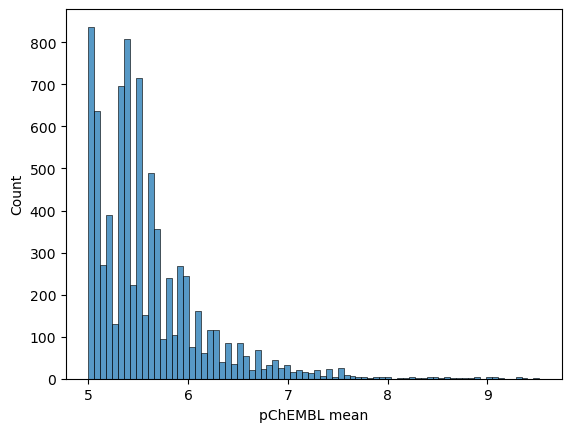

In [59]:
sns.histplot(data=clean_deduped, x="pChEMBL mean")

In [60]:
clean_deduped.to_csv("processed/chembl_active.csv", index=False)

# Subselect by number of assay appearances

In [61]:
L = 3 # compounds must appear in L or more assays

In [62]:


more_than_eq_L_assay = clean_deduped[clean_deduped["appears_in_N_ChEMBL_assays"] >= L]
more_than_eq_L_assay

,CANONICAL_SMILES,INCHIKEY,pChEMBL mean,pChEMBL std,common_name,appears_in_N_ChEMBL_assays,action_type,dataset,active
1465,CC(=O)N1CCN(c2ccc(OCC3COC(Cn4ccnc4)(c4ccc(Cl)c...,XMAYWYJOQHXEEK-UHFFFAOYSA-N,7.013500,0.618796,KETOCONAZOLE,21,NaN,ChEMBL_curated,True
28586,CCC1C(=O)OC[C@H]1Cc1cncn1C,QCHFTSOMWOSFHM-HNHGDDPOSA-N,5.052941,0.285302,SALAGEN,17,NaN,ChEMBL_curated,True
38232,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,VNFPBHJOKIVQEB-UHFFFAOYSA-N,7.237692,0.358798,CLOTRIMAZOLE,14,NaN,ChEMBL_curated,True
24962,CNCCCC12CCC(c3ccccc31)c1ccccc12,QSLMDECMDJKHMQ-UHFFFAOYSA-N,5.473846,0.281470,MAPROTILINE HYDROCHLORIDE,13,NaN,ChEMBL_curated,True
2906,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,BYBLEWFAAKGYCD-UHFFFAOYSA-N,6.060000,0.608590,MICONAZOLE NITRATE,12,NaN,ChEMBL_curated,True
...,...,...,...,...,...,...,...,...,...
26878,COC(=O)C1C(=O)c2ccccc2O[C@@](C(=O)OC)(c2ccccc2...,NBCHFTXDNXUEKN-JMTSZPDESA-N,5.400000,0.000000,NaN,3,NaN,ChEMBL_curated,True
30281,CNc1ncnc2ccc(-c3ccccc3CN(C)C)cc12,BUAWUYUQLBPGDW-UHFFFAOYSA-N,5.100000,0.000000,NaN,3,NaN,ChEMBL_curated,True
30468,COC(=O)[C@@]1(Cc2ccccc2)[C@H]2c3cc(C(=O)N(C)C)...,LHRDAYSQQHZXIP-SNLOLGNNSA-N,6.000000,0.000000,NaN,3,NaN,ChEMBL_curated,True
27643,COc1ccc2[nH]cc(CCNc3ncnc4ccc(-c5cccnc5)cc34)c2c1,GRMIDXUPMOYGMU-UHFFFAOYSA-N,6.000000,0.000000,NaN,3,NaN,ChEMBL_curated,True


In [63]:
more_than_eq_L_assay.INCHIKEY.nunique()

2696

<Axes: xlabel='appears_in_N_ChEMBL_assays', ylabel='count'>

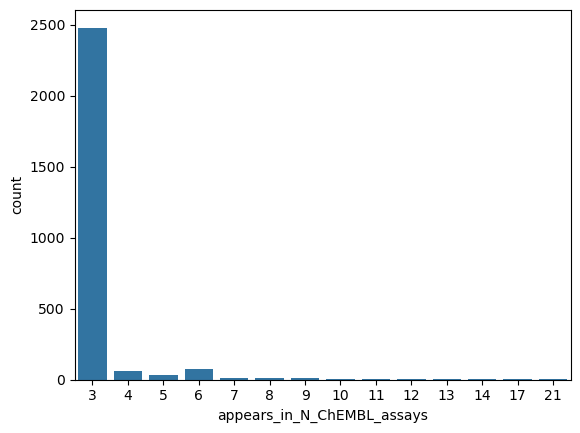

In [64]:
sns.countplot(data=more_than_eq_L_assay, x="appears_in_N_ChEMBL_assays")

<Axes: xlabel='pChEMBL mean', ylabel='Count'>

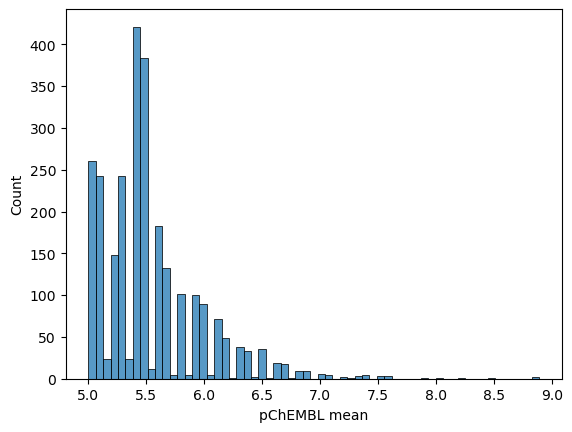

In [65]:
sns.histplot(data=more_than_eq_L_assay, x="pChEMBL mean")

In [66]:
more_than_eq_L_assay

,CANONICAL_SMILES,INCHIKEY,pChEMBL mean,pChEMBL std,common_name,appears_in_N_ChEMBL_assays,action_type,dataset,active
1465,CC(=O)N1CCN(c2ccc(OCC3COC(Cn4ccnc4)(c4ccc(Cl)c...,XMAYWYJOQHXEEK-UHFFFAOYSA-N,7.013500,0.618796,KETOCONAZOLE,21,NaN,ChEMBL_curated,True
28586,CCC1C(=O)OC[C@H]1Cc1cncn1C,QCHFTSOMWOSFHM-HNHGDDPOSA-N,5.052941,0.285302,SALAGEN,17,NaN,ChEMBL_curated,True
38232,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,VNFPBHJOKIVQEB-UHFFFAOYSA-N,7.237692,0.358798,CLOTRIMAZOLE,14,NaN,ChEMBL_curated,True
24962,CNCCCC12CCC(c3ccccc31)c1ccccc12,QSLMDECMDJKHMQ-UHFFFAOYSA-N,5.473846,0.281470,MAPROTILINE HYDROCHLORIDE,13,NaN,ChEMBL_curated,True
2906,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,BYBLEWFAAKGYCD-UHFFFAOYSA-N,6.060000,0.608590,MICONAZOLE NITRATE,12,NaN,ChEMBL_curated,True
...,...,...,...,...,...,...,...,...,...
26878,COC(=O)C1C(=O)c2ccccc2O[C@@](C(=O)OC)(c2ccccc2...,NBCHFTXDNXUEKN-JMTSZPDESA-N,5.400000,0.000000,NaN,3,NaN,ChEMBL_curated,True
30281,CNc1ncnc2ccc(-c3ccccc3CN(C)C)cc12,BUAWUYUQLBPGDW-UHFFFAOYSA-N,5.100000,0.000000,NaN,3,NaN,ChEMBL_curated,True
30468,COC(=O)[C@@]1(Cc2ccccc2)[C@H]2c3cc(C(=O)N(C)C)...,LHRDAYSQQHZXIP-SNLOLGNNSA-N,6.000000,0.000000,NaN,3,NaN,ChEMBL_curated,True
27643,COc1ccc2[nH]cc(CCNc3ncnc4ccc(-c5cccnc5)cc34)c2c1,GRMIDXUPMOYGMU-UHFFFAOYSA-N,6.000000,0.000000,NaN,3,NaN,ChEMBL_curated,True


In [67]:
more_than_eq_L_assay["common_name"].value_counts()

common_name
KETOCONAZOLE              1
BENZONATATE               1
(S)-ISRADIPINE            1
CGS-15943                 1
(S)-FELODIPINE            1
                         ..
FLUTAMIDE                 1
TORSEMIDE                 1
FIPEXIDE HYDROCHLORIDE    1
ELLIPTECINE               1
POSACONAZOLE              1
Name: count, Length: 254, dtype: int64

In [68]:
more_than_eq_L_assay.to_csv("processed/chembl_active_selected.csv", index=False)